# **Telco Customer Churn**


**Description** <br/>
*This project aims to gain valuable insights from the dataset of customers of Telco, comprising information such as churn label (whether customer churned or not), churn reason (reason why the customer churn), and many other factors such as demographic, revenue earned from the customer and the service provided to the customer. Through these insights, company can adjust their service to retain its customer. Also, this project conducts a ML projection to predict potential churn customer.*

**Importing the dataset from Kaggle**

In [442]:
!kaggle datasets download rhonarosecortez/telco-customer-churn
!unzip telco-customer-churn.zip

**Importing necessary libraries for loading, cleaning data and conducting EDA**

In [443]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# **Data Loading and Cleaning**

In [444]:
df = pd.read_csv('/content/TelcoCustomerChurn.csv')
df.head()

,CustomerID,Gender,Age,Under30,SeniorCitizen,Married,Dependents,NumberofDependents,Country,State,...,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,SatisfactionScore,CustomerStatus,ChurnLabel,ChurnScore,CLTV,ChurnCategory,ChurnReason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [445]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Under30', 'SeniorCitizen', 'Married',
       'Dependents', 'NumberofDependents', 'Country', 'State', 'City',
       'ZipCode', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'ReferredaFriend', 'Number_of_Referrals', 'TenureinMonths', 'Offer',
       'PhoneService', 'AvgMonthlyLongDistanceCharges', 'MultipleLines',
       'InternetService', 'InternetType', 'AvgMonthlyGBDownload',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtectionPlan',
       'PremiumTechSupport', 'StreamingTV', 'StreamingMovies',
       'StreamingMusic', 'UnlimitedData', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharge', 'TotalCharges', 'TotalRefunds',
       'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'TotalRevenue',
       'SatisfactionScore', 'CustomerStatus', 'ChurnLabel', 'ChurnScore',
       'CLTV', 'ChurnCategory', 'ChurnReason'],
      dtype='object')

**Checking data type of the columns, as well as null duplocated values**

In [446]:
print(df.info())
print('----------------------------------------------------')
print(df.isnull().sum())
print('----------------------------------------------------')
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     7043 non-null   object 
 1   Gender                         7043 non-null   object 
 2   Age                            7043 non-null   int64  
 3   Under30                        7043 non-null   object 
 4   SeniorCitizen                  7043 non-null   object 
 5   Married                        7043 non-null   object 
 6   Dependents                     7043 non-null   object 
 7   NumberofDependents             7043 non-null   int64  
 8   Country                        7043 non-null   object 
 9   State                          7043 non-null   object 
 10  City                           7043 non-null   object 
 11  ZipCode                        7043 non-null   int64  
 12  Latitude                       7043 non-null   f

**Check for the number of unique vales in each columns.**

In [447]:
for col in df.columns:
  print(f'{col}: {df[col].nunique()}')

CustomerID: 7043
Gender: 2
Age: 62
Under30: 2
SeniorCitizen: 2
Married: 2
Dependents: 2
NumberofDependents: 10
Country: 1
State: 1
City: 1106
ZipCode: 1626
Latitude: 1626
Longitude: 1625
Population: 1569
Quarter: 1
ReferredaFriend: 2
Number_of_Referrals: 12
TenureinMonths: 72
Offer: 5
PhoneService: 2
AvgMonthlyLongDistanceCharges: 3584
MultipleLines: 2
InternetService: 2
InternetType: 3
AvgMonthlyGBDownload: 50
OnlineSecurity: 2
OnlineBackup: 2
DeviceProtectionPlan: 2
PremiumTechSupport: 2
StreamingTV: 2
StreamingMovies: 2
StreamingMusic: 2
UnlimitedData: 2
Contract: 3
PaperlessBilling: 2
PaymentMethod: 3
MonthlyCharge: 1585
TotalCharges: 6540
TotalRefunds: 500
TotalExtraDataCharges: 16
TotalLongDistanceCharges: 6068
TotalRevenue: 6975
SatisfactionScore: 5
CustomerStatus: 3
ChurnLabel: 2
ChurnScore: 81
CLTV: 3438
ChurnCategory: 5
ChurnReason: 20


**Handling null values**

In [448]:
col_w_null = ['Offer', 'InternetType','ChurnCategory','ChurnReason']

In [449]:
for col in col_w_null:
  print(f'{col}: {df[col].unique()}')

Offer: [nan 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']
InternetType: ['DSL' 'Fiber Optic' 'Cable' nan]
ChurnCategory: ['Competitor' 'Dissatisfaction' 'Price' 'Other' 'Attitude' nan]
ChurnReason: ['Competitor offered more data' 'Competitor made better offer'
 'Limited range of services' 'Extra data charges'
 'Competitor had better devices' "Don't know" 'Service dissatisfaction'
 'Lack of affordable download/upload speed' 'Product dissatisfaction'
 'Long distance charges' 'Poor expertise of online support'
 'Attitude of support person' 'Network reliability'
 'Competitor offered higher download speeds' 'Moved' 'Price too high'
 'Attitude of service provider' 'Poor expertise of phone support'
 'Deceased' nan 'Lack of self-service on Website']


In [450]:
print(df['InternetService'].unique())
print(df['ChurnLabel'].unique())

['Yes' 'No']
['Yes' 'No']


It seems that the null values in 2 columns 'InternetType' and 'ChurnCategory' (as well as 'ChurnReason') are aligned with 'No' rows in 2 columns 'InternetService' and 'ChurnLabel', respectively.

Check if whether there is null values in Internet Type for 'Yes' value InternetService; and whether there is null values in ChurnCategory, ChurnReason for 'Yes' value ChurnLabel

In [451]:
#Check if whether there is null values in Internet Type for 'Yes' value InternetService
print('null values for Yes value InternetService:', df[df['InternetService'] == 'Yes']['InternetType'].isnull().sum())
#Check if whether there is null values in ChurnCategory, ChurnReason for 'Yes' value ChurnLabel
print('null values for Yes value ChurnLabel:\n',df[df['ChurnLabel'] == 'Yes'][['ChurnCategory','ChurnReason']].isnull().sum())

null values for Yes value InternetService: 0
null values for Yes value ChurnLabel:
 ChurnCategory    0
ChurnReason      0
dtype: int64


Replace Null values

In [452]:
df.fillna('No', inplace = True)
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Under30,0
SeniorCitizen,0
Married,0
Dependents,0
NumberofDependents,0
Country,0
State,0


**Dropping unecessary columns**


As there's already an 'Age' column --> drop 'Under30' <br/>
There's already a 'NumberofDependents' column --> drop 'Dependents' <br/>
Drop 'Country' and 'State' and 'Quarter', as these columns have 1 unique value, and 'ZipCode'

In [453]:
df = df.drop(columns = ['Under30', 'Dependents','Country','State', 'Quarter', 'ZipCode'])
df.columns

Index(['CustomerID', 'Gender', 'Age', 'SeniorCitizen', 'Married',
       'NumberofDependents', 'City', 'Latitude', 'Longitude', 'Population',
       'ReferredaFriend', 'Number_of_Referrals', 'TenureinMonths', 'Offer',
       'PhoneService', 'AvgMonthlyLongDistanceCharges', 'MultipleLines',
       'InternetService', 'InternetType', 'AvgMonthlyGBDownload',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtectionPlan',
       'PremiumTechSupport', 'StreamingTV', 'StreamingMovies',
       'StreamingMusic', 'UnlimitedData', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharge', 'TotalCharges', 'TotalRefunds',
       'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'TotalRevenue',
       'SatisfactionScore', 'CustomerStatus', 'ChurnLabel', 'ChurnScore',
       'CLTV', 'ChurnCategory', 'ChurnReason'],
      dtype='object')

# **EDA**

**Checking columns related to revenue gained from a customer**

In [454]:
df[['TenureinMonths','MonthlyCharge', 'TotalCharges', 'TotalRefunds','TotalExtraDataCharges', 'AvgMonthlyLongDistanceCharges','TotalLongDistanceCharges', 'TotalRevenue']]

,TenureinMonths,MonthlyCharge,TotalCharges,TotalRefunds,TotalExtraDataCharges,AvgMonthlyLongDistanceCharges,TotalLongDistanceCharges,TotalRevenue
0,1,39.65,39.65,0.00,20,0.00,0.00,59.65
1,8,80.65,633.30,0.00,0,48.85,390.80,1024.10
2,18,95.45,1752.55,45.61,0,11.33,203.94,1910.88
3,25,98.50,2514.50,13.43,0,19.76,494.00,2995.07
4,37,76.50,2868.15,0.00,0,6.33,234.21,3102.36
...,...,...,...,...,...,...,...,...
7038,72,21.15,1419.40,19.31,0,22.77,1639.44,3039.53
7039,24,84.80,1990.50,48.23,0,36.05,865.20,2807.47
7040,72,103.20,7362.90,45.38,0,29.66,2135.52,9453.04
7041,11,29.60,346.45,27.24,0,0.00,0.00,319.21


We can see:
* Total Charges ~ Tenure * Monthly Charge
* Total Long Distance Charges = Tenure * AVG Long Distance Charge
* TotalRevenue = TotalCharges - TotalRefunds + TotalExtraDataCharges + TotalLongDistanceCharges

**List out necessary numeric, object and coordination columns**

In [455]:
num = []
ob = []
location = ['Latitude','Longitude']
for col in df.columns:
  if df[col].dtype == 'object':
    ob.append(col)
  elif col in location:
    continue
  else:
    num.append(col)
ob.remove('CustomerID')
print('numeric:', num)
print('object: ', ob)
print('location: ', location)

numeric: ['Age', 'NumberofDependents', 'Population', 'Number_of_Referrals', 'TenureinMonths', 'AvgMonthlyLongDistanceCharges', 'AvgMonthlyGBDownload', 'MonthlyCharge', 'TotalCharges', 'TotalRefunds', 'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'TotalRevenue', 'SatisfactionScore', 'ChurnScore', 'CLTV']
object:  ['Gender', 'SeniorCitizen', 'Married', 'City', 'ReferredaFriend', 'Offer', 'PhoneService', 'MultipleLines', 'InternetService', 'InternetType', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtectionPlan', 'PremiumTechSupport', 'StreamingTV', 'StreamingMovies', 'StreamingMusic', 'UnlimitedData', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'CustomerStatus', 'ChurnLabel', 'ChurnCategory', 'ChurnReason']
location:  ['Latitude', 'Longitude']


**Illustrating histogram plot for numeric columns**

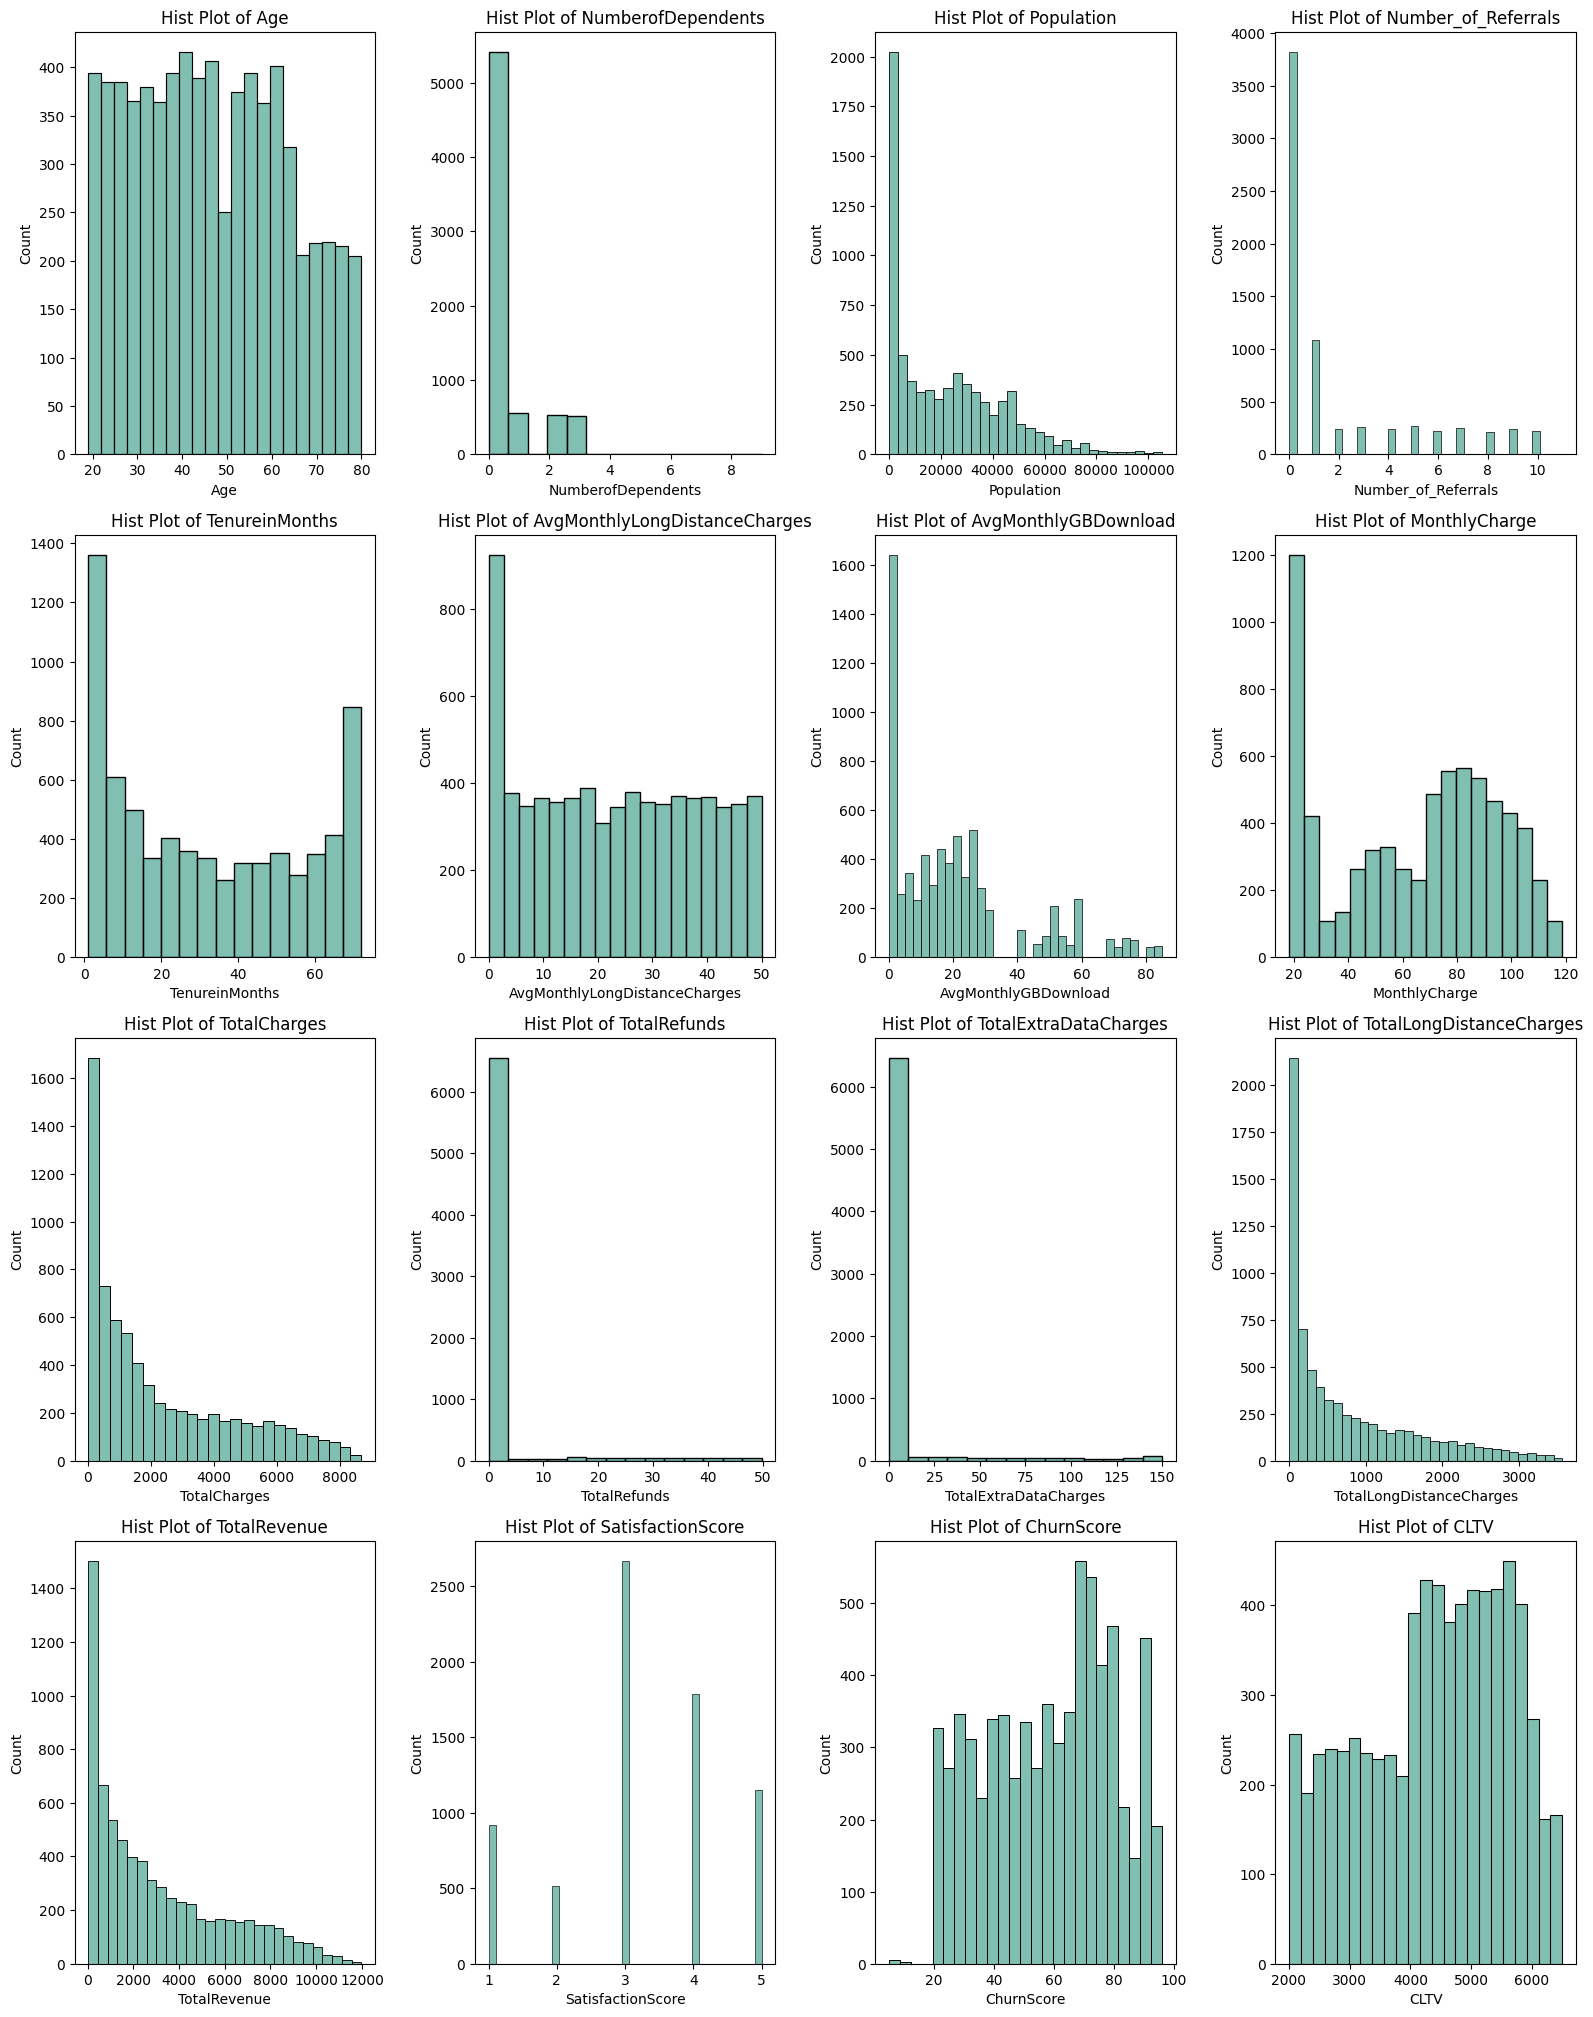

In [456]:
def plot_histplot(df, color = '#5A9', hue = None):
  num_columns = len(df.columns)
  num_rows = (num_columns + 1) // 2

  fig, axes = plt.subplots(num_rows, 4, figsize = (16, 5 * num_rows))
  axes = axes.flatten()

  for i, column in enumerate(df.columns):
    sns.histplot(data = df, x = column, hue = hue, ax = axes[i], color = color)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Hist Plot of {column}')

  for j in range(i, len(axes)):
    fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()
plot_histplot(df[num + ['ChurnLabel']])

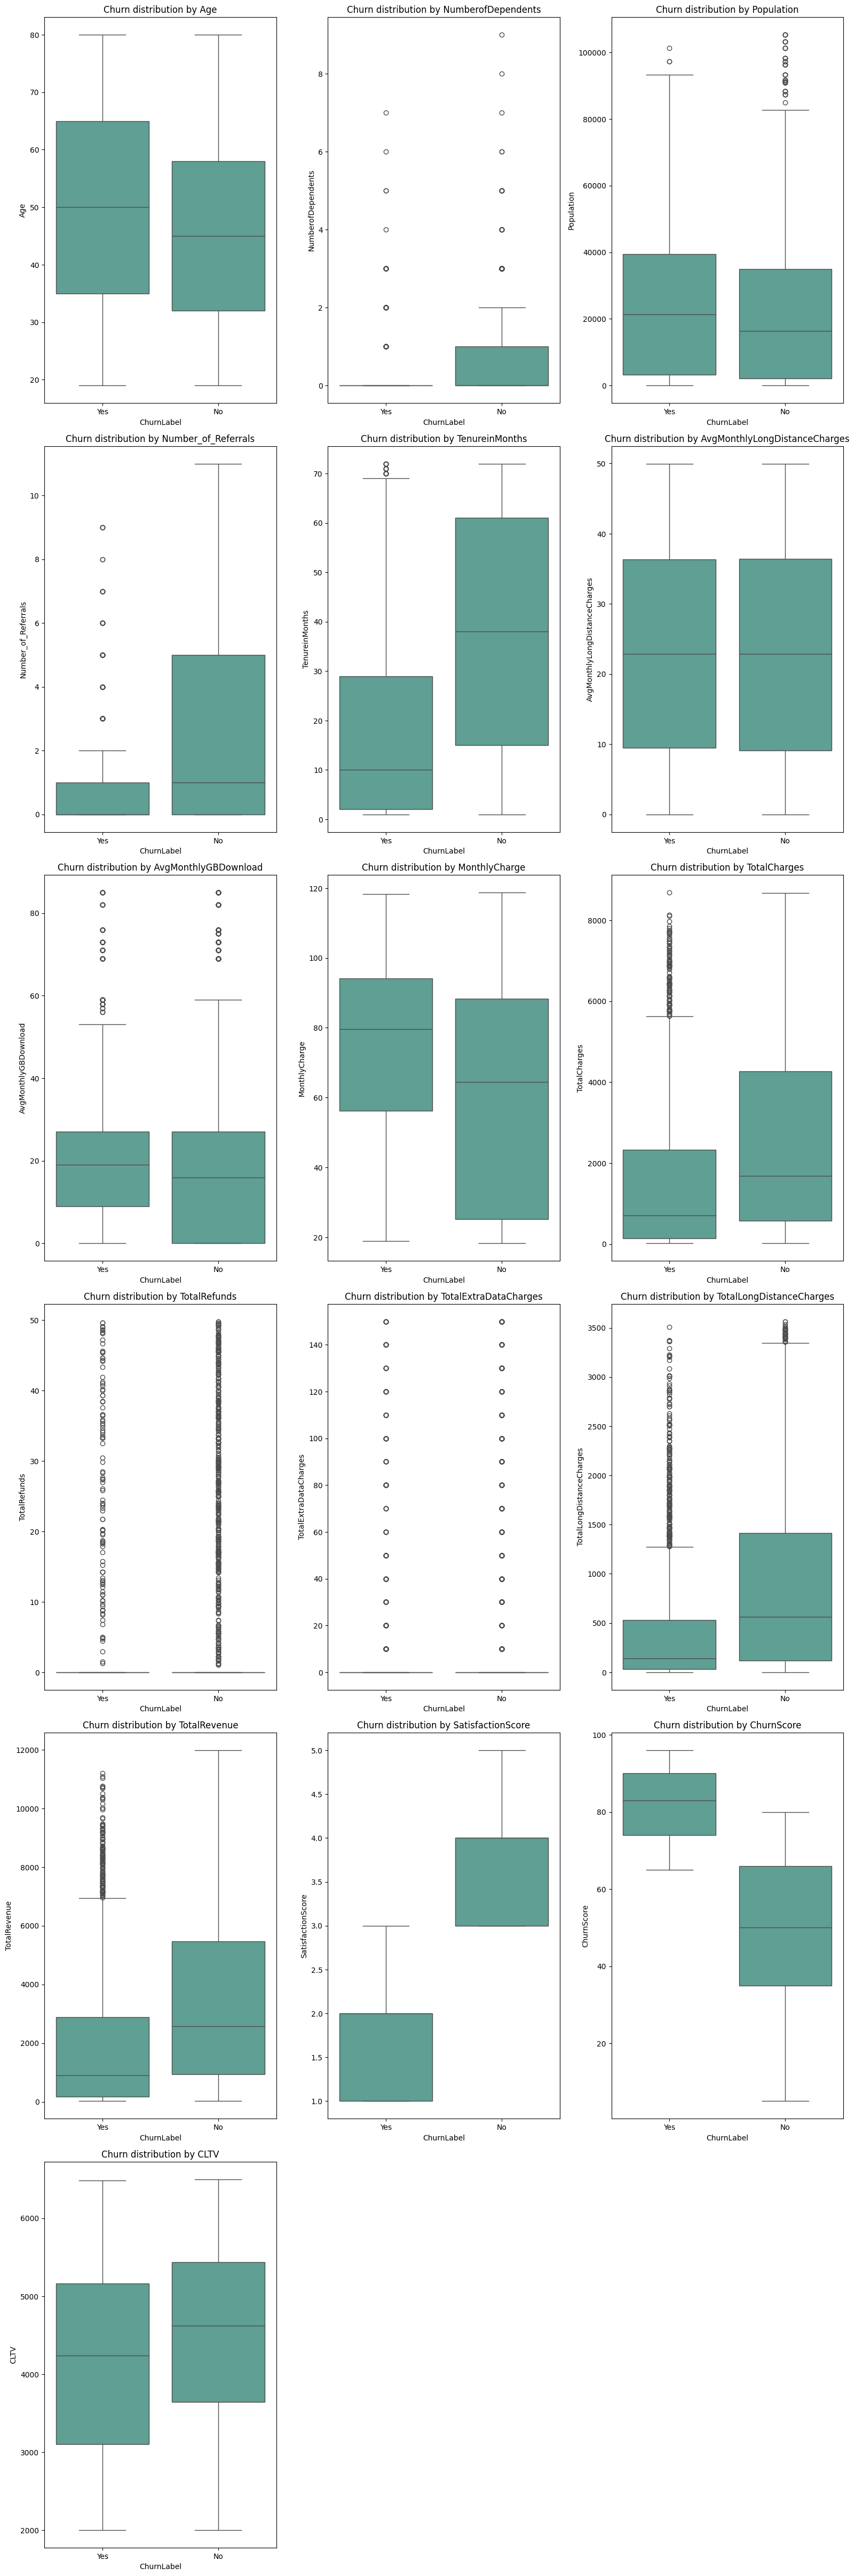

In [457]:
def plot_boxplot(df, x, color = '#55aa99'):
  num_columns = len(df.drop(columns = x).columns)
  num_rows = (num_columns + 1) // 2

  fig, axes = plt.subplots(num_rows, 3, figsize = (16, 8 * num_rows))
  axes = axes.flatten()
  for i, column in enumerate(df.drop(columns = x).columns):
    sns.boxplot(data = df, x = x, y = column, ax = axes[i], color = color)
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(column)
    axes[i].set_title(f'Churn distribution by {column}')

  for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()
plot_boxplot(df[['ChurnLabel'] + num], x = 'ChurnLabel')

According to these boxplots above, we can gain some information:
* Age: churned customers tend to be older than staying customers.
* Number of Referrals: Staying customers tend to have more referrals than churned customers.
* TenureInMonths: churned customers tend to have shorter time using service from the company. While for the stayed customer, the pattern is opposite.
* MonthlyCharge: Churned customers have the interquartile and the median value of monthly charge higher than those of staying customers.
* TotalCharges and TotalRevenue: These two features have the opposite pattern from MonthlyCharge, company gains more revenue from the staying customers. This can be explained by that staying customers stick with the company longer --> Higher TenureInMonths --> Higher TotalCharges and TotalRevenue
* ChurnScore (score that predict the likelihood to churn): Churned customers have higher ChurnScore, obviously.
* SatisfactionScore: churned customer has lower SatisfactionScore, obviously.
* CLTV (Customer Time Value): interquartile of stayed customers approximately distributed in the span of 3600 to 5300, while for the churned customers, interquatile is in the span of approximately 3100 to about 5100.

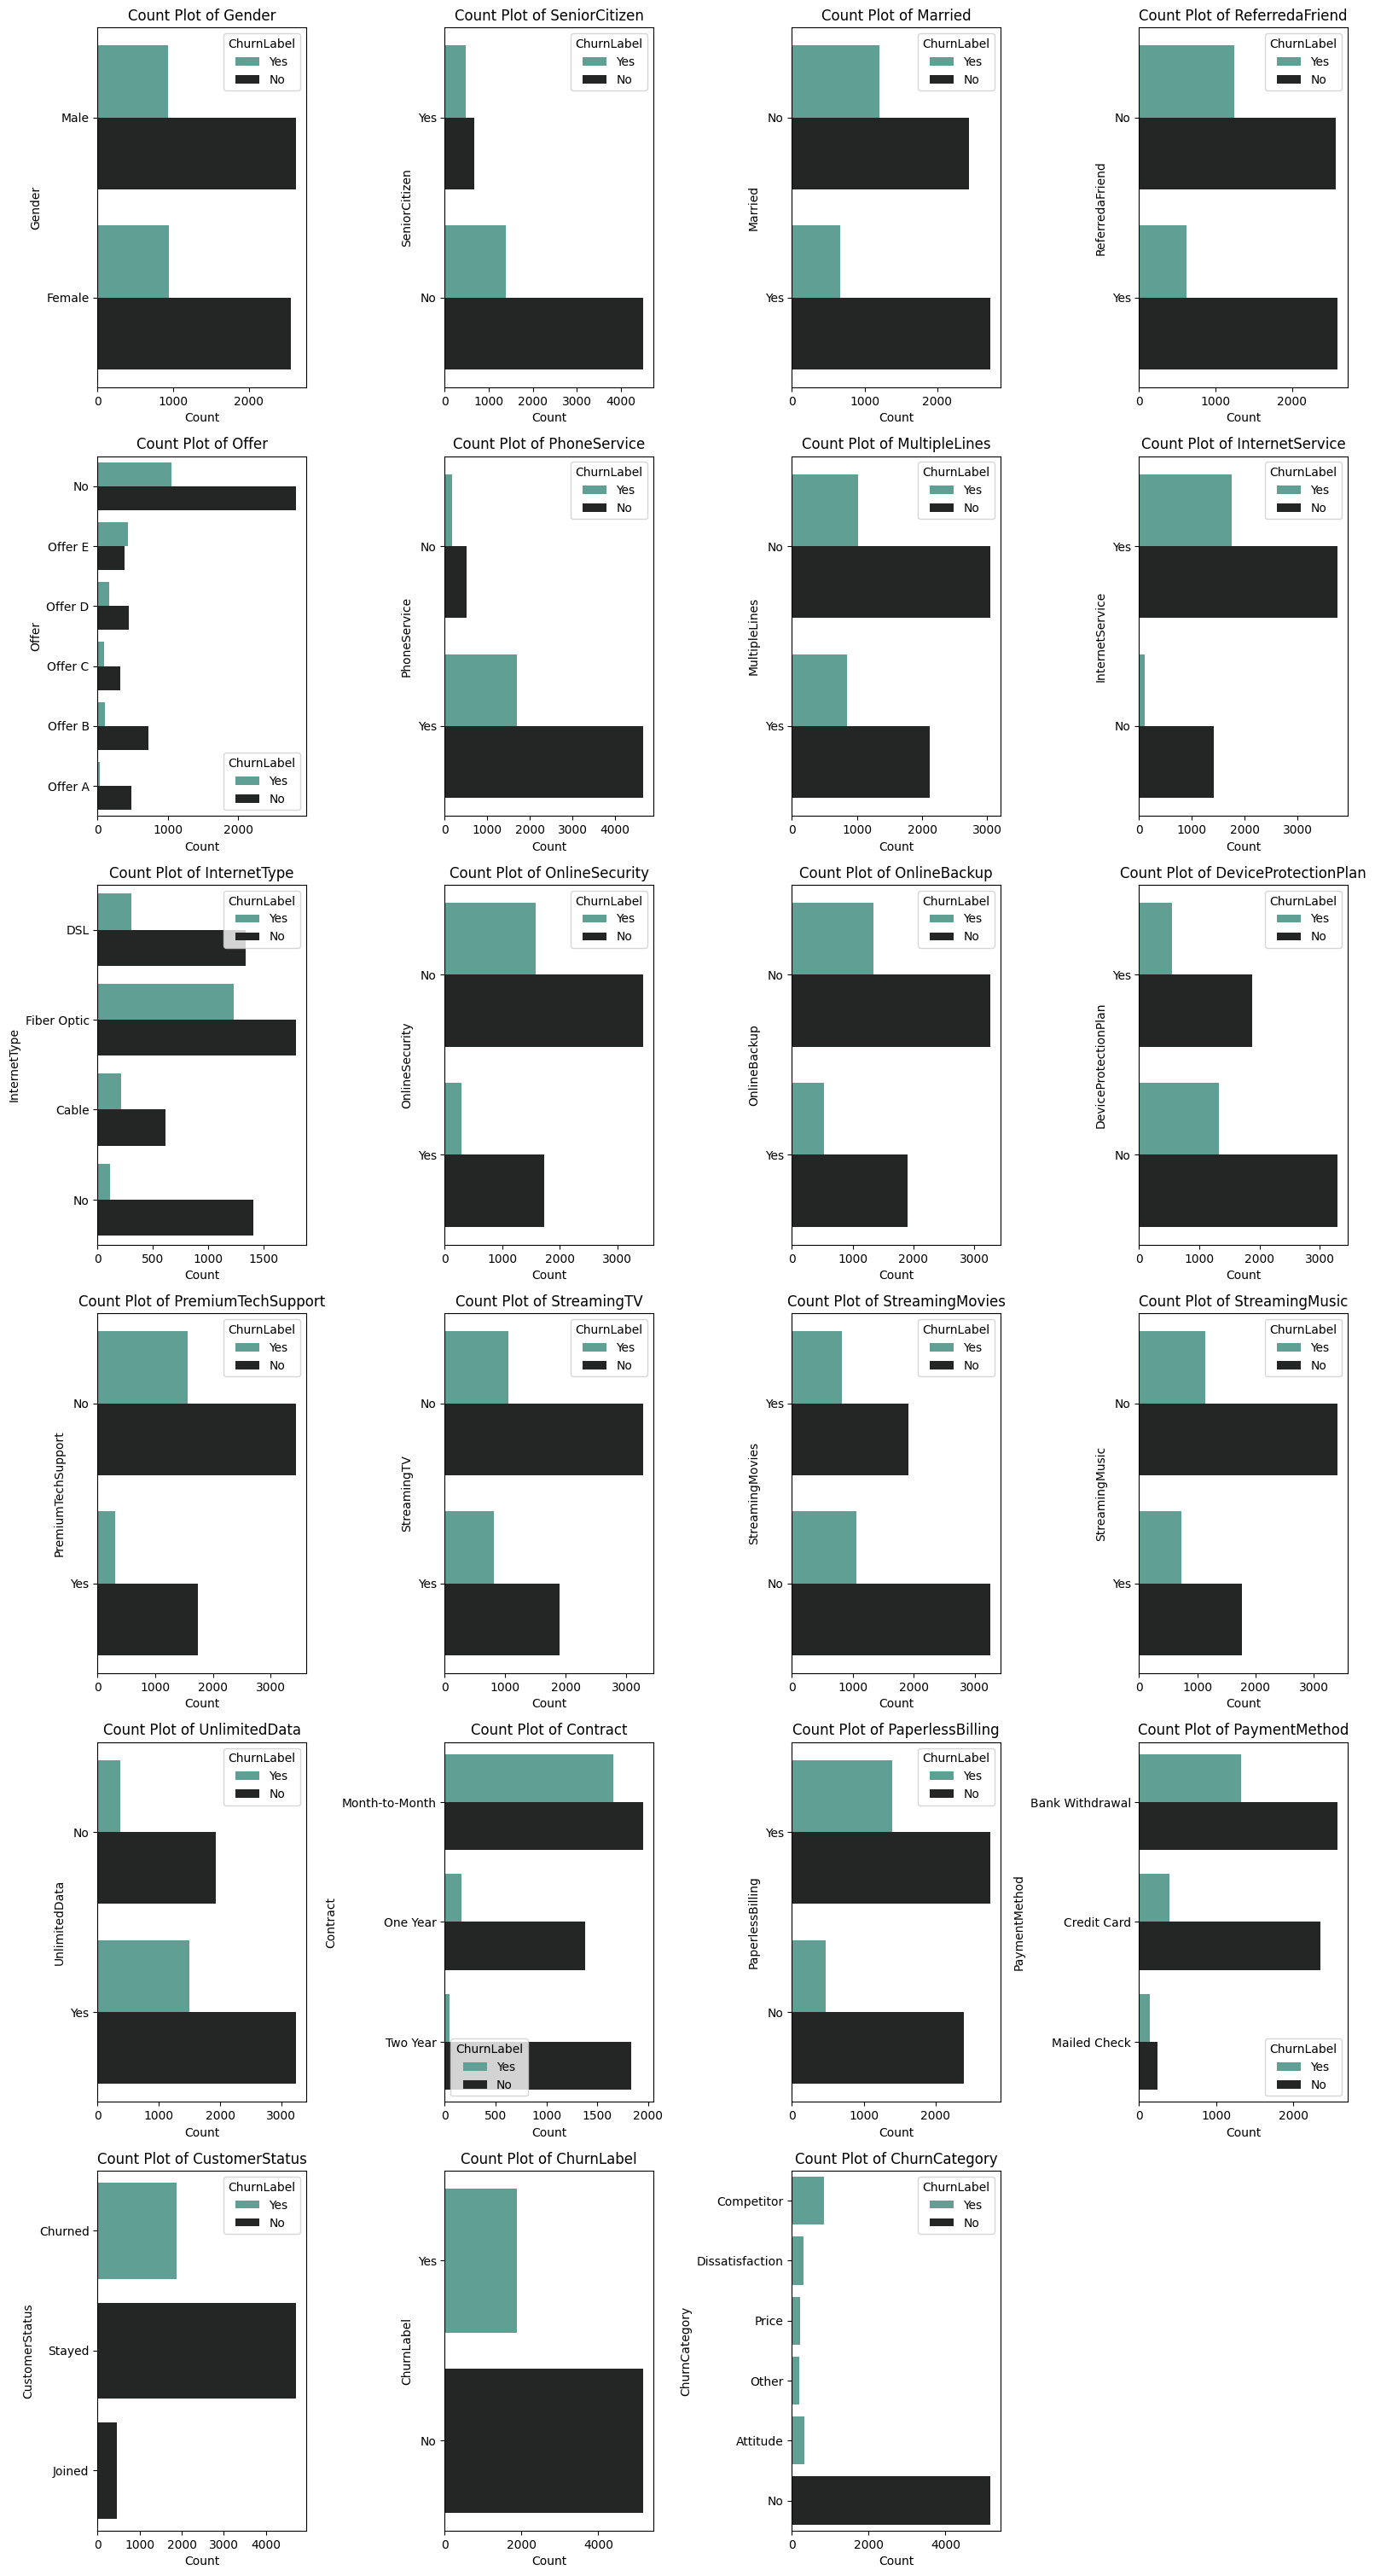

In [458]:
def plot_countplot(df, palette = 'dark:#5A9_r', hue = None):
  num_columns = len(df.columns)
  num_rows = (num_columns + 1) // 2

  fig, axes = plt.subplots(num_rows, 4 , figsize = (16, 5 * num_rows))
  axes = axes.flatten()

  for i, column in enumerate(df.columns):
    sns.countplot(data = df, y = column, hue = hue, ax = axes[i], palette = palette)
    axes[i].set_ylabel(column)
    axes[i].set_xlabel('Count')
    axes[i].set_title(f'Count Plot of {column}')

  for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()
plot_countplot(df[ob].drop(columns = ['ChurnReason', 'City']), hue = 'ChurnLabel')

From the multiple plots above, we can gain some insights, which are:
* Count plot of Contract: most of the churned customers are likely to have month-to-month contract

Text(0.5, 1.0, 'Count Plot of Churn Reason')

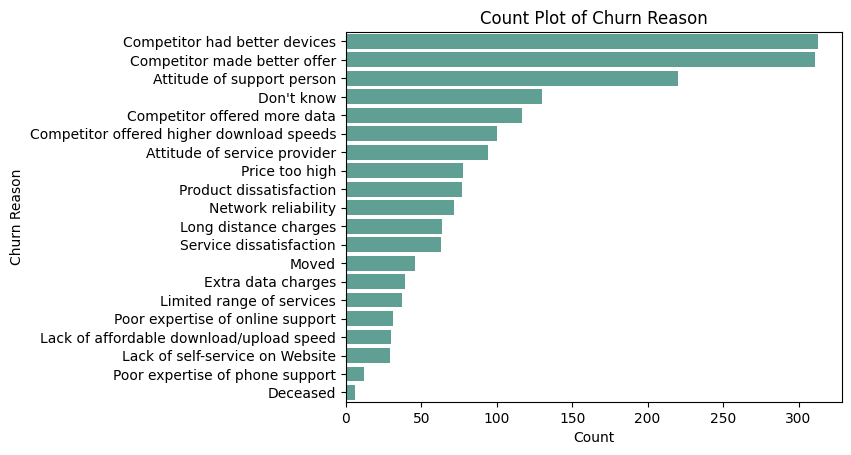

In [459]:
sns.countplot(data = df[df['ChurnReason'] != 'No'], y = 'ChurnReason', color = '#55aa99', order = df[df['ChurnReason'] != 'No']['ChurnReason'].value_counts().index)
plt.ylabel('Churn Reason')
plt.xlabel('Count')
plt.title('Count Plot of Churn Reason')

According to the Countplot of Churn Reason, we can see that the top 3 reasons which stand out are 'Competitor had better devices', 'Competitor made better offer', and 'Attitude of support person'. <br/>
These numbers emphasize the competitiveness of the competitor, as well as the poor perfomance in customer support service.

In [460]:
df['City_count'] = df.groupby('City')['City'].transform('count')
df[['City','City_count']]

,City,City_count
0,Los Angeles,293
1,Los Angeles,293
2,Los Angeles,293
3,Inglewood,25
4,Whittier,30
...,...,...
7038,Landers,4
7039,Adelanto,5
7040,Amboy,5
7041,Angelus Oaks,4


In [461]:
plt.figure(figsize = (20,10))
fig = go.Figure(data = go.Scattergeo(
    lon = df['Longitude'],
    lat = df['Latitude'],
    text = df['City'],
    mode = 'markers',
    marker = dict(
        size = 3,
        opacity = 0.5,
        reversescale = False,
        autocolorscale = False,
        symbol = 'circle',
        line = dict(
            width = 0.3,
            color = 'rgba(102, 102, 102)'
        ),
        colorscale = 'Blues',
        cmin = 0,
        color = df['City_count'],
        cmax = df['City_count'].max(),
        colorbar_title = 'City Count'
    )
))
fig.update_layout(
    title = 'Customer Location',
    geo_scope = 'usa',
)

fig.show()

<Figure size 2000x1000 with 0 Axes>

# **Feature Engineering**

**Correlation Matrix**

<Axes: >

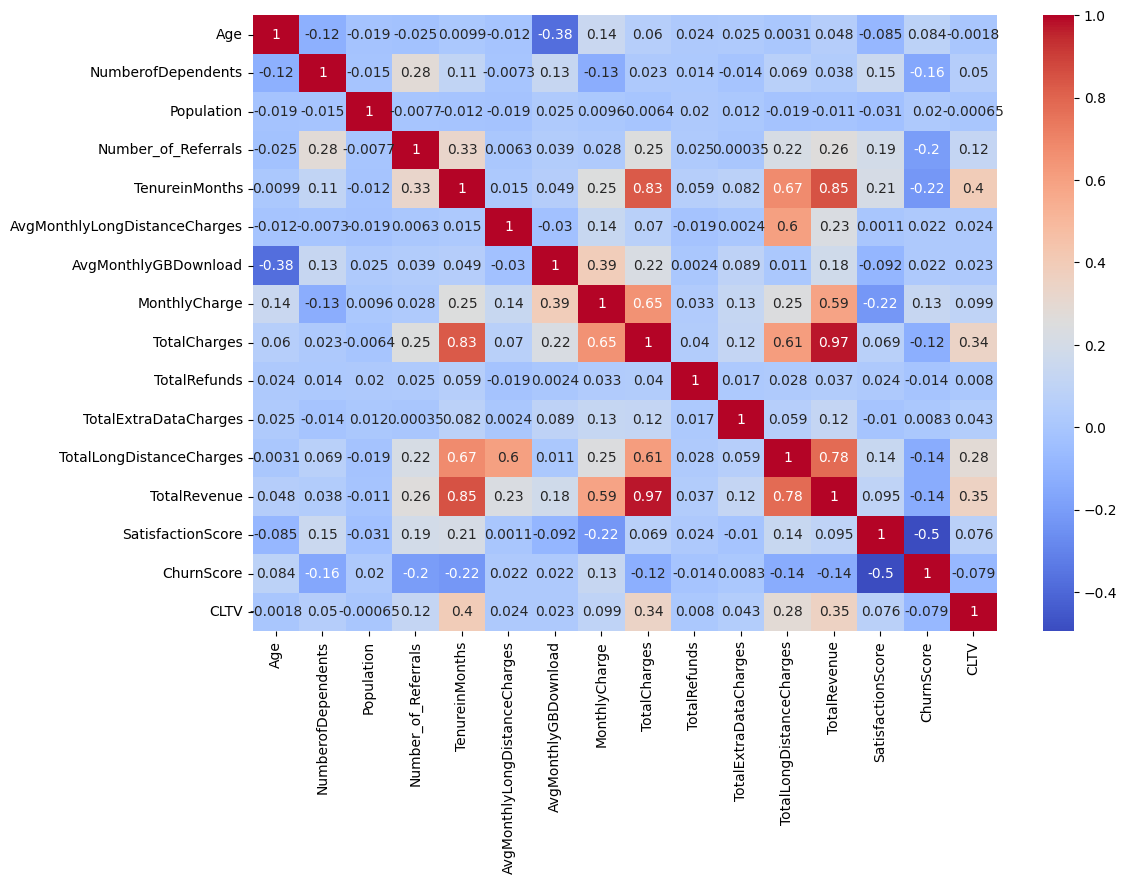

In [462]:
correlation = df[num].corr()
plt.figure(figsize = (12,8))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

1. TenureinMonths are highly positively correlated with TotalCharges, TotalLongDistanceCharges, TotalRevenue.
2. AVGMonthlyGBDownload is positive correlated with TotalLongDistanceCharges.
3. MonthlyCharge is positive correlated with TotalRevenue
4. TotalCharges is positively correlated with TotalLongDistanceCharges.
5. TotalCharges is excessively correlated with Total Revenue.
6. TotalLongDistanceCharges is positively correlated with TotalRevenue
7. SatisfactionScire is negatively correlated with ChurnScore
--> There are some features need to be removed before building a machine learning model to avoid colinearity.


**Using VIF to determine which variable to omit**

In [463]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['feature'] = num
vif_data['VIF'] = [variance_inflation_factor(df[num].values,i) for i in range(len(num))]
print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



                          feature        VIF
0                             Age  10.279401
1              NumberofDependents   1.439277
2                      Population   2.065042
3             Number_of_Referrals   1.734145
4                  TenureinMonths  18.697903
5   AvgMonthlyLongDistanceCharges   8.685276
6            AvgMonthlyGBDownload   3.140482
7                   MonthlyCharge  20.879315
8                    TotalCharges        inf
9                    TotalRefunds        inf
10          TotalExtraDataCharges        inf
11       TotalLongDistanceCharges        inf
12                   TotalRevenue        inf
13              SatisfactionScore   7.808896
14                     ChurnScore   8.761294
15                           CLTV  14.586816


TotalCharges, TotalRefunds, TotalExtraDataCharges, TotalLongDistanceCharges and Total Revenue have infinity VIF. As these variables are related in a calculation formula. --> Omit these variables and retain one (Total Revenue) <br/>
Other variables with VIF > 10 will be omitted. <br/>
Omitted variables: TotalCharges, TotalRefunds, TotalExtraDataCharges, TotalLongDistanceCharges, Age, TenureinMonths, MonthlyCharge, CLTV



**Applying onehotencoding to categorical data and create a new dataframe**

In [464]:
for col in ob:
  print(f'{col}: {df[col].unique()}')

Gender: ['Male' 'Female']
SeniorCitizen: ['Yes' 'No']
Married: ['No' 'Yes']
City: ['Los Angeles' 'Inglewood' 'Whittier' ... 'Topaz' 'Jacumba' 'Holtville']
ReferredaFriend: ['No' 'Yes']
Offer: ['No' 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['Yes' 'No']
InternetType: ['DSL' 'Fiber Optic' 'Cable' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['No' 'Yes']
DeviceProtectionPlan: ['Yes' 'No']
PremiumTechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['Yes' 'No']
StreamingMusic: ['No' 'Yes']
UnlimitedData: ['No' 'Yes']
Contract: ['Month-to-Month' 'One Year' 'Two Year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Bank Withdrawal' 'Credit Card' 'Mailed Check']
CustomerStatus: ['Churned' 'Stayed' 'Joined']
ChurnLabel: ['Yes' 'No']
ChurnCategory: ['Competitor' 'Dissatisfaction' 'Price' 'Other' 'Attitude' 'No']
ChurnReason: ['Competitor offered more data' 'Competitor made better offer'
 'Limit

Columns with 2 values --> get_dummies
<br/>Columns with more than 2 values --> OneHotEncoder
<br/>Remove City as the data is not necessary
<br/>Remove ChurnReason as the data is categorized in ChurnLabel

In [465]:
ob.remove('City')
ob.remove('ChurnReason')
ob_dummies = []
ob_ohe = []
for col in ob:
  if df[col].nunique() == 2:
    ob_dummies.append(col)
  else:
    ob_ohe.append(col)
print(ob_dummies)
print(ob_ohe)

['Gender', 'SeniorCitizen', 'Married', 'ReferredaFriend', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtectionPlan', 'PremiumTechSupport', 'StreamingTV', 'StreamingMovies', 'StreamingMusic', 'UnlimitedData', 'PaperlessBilling', 'ChurnLabel']
['Offer', 'InternetType', 'Contract', 'PaymentMethod', 'CustomerStatus', 'ChurnCategory']


Getting dummies variables

In [466]:
dummies = pd.get_dummies(df[ob_dummies],drop_first = True).astype(int)
for col in dummies.columns:
  if col == 'Gender_Male':
    dummies.rename(columns = {'Gender_Male' : 'Gender'}, inplace = True)
  else:
    dummies.rename(columns = {col : col[:-4]}, inplace = True)
dummies.head()

,Gender,SeniorCitizen,Married,ReferredaFriend,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtectionPlan,PremiumTechSupport,StreamingTV,StreamingMovies,StreamingMusic,UnlimitedData,PaperlessBilling,ChurnLabel
0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1
1,0,1,1,1,1,1,1,0,1,0,0,0,0,0,1,1,1
2,1,1,0,0,1,1,1,0,0,0,0,1,1,1,1,1,1
3,0,1,1,1,1,0,1,0,1,1,0,1,1,0,1,1,1
4,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1


Applying One Hot Encoder and create a new Dataframe

In [467]:
ohe = OneHotEncoder(sparse_output=False)
encoded_cols = ohe.fit_transform(df[ob_ohe])
encoded_cols_df = pd.DataFrame(encoded_cols, columns = ohe.get_feature_names_out(ob_ohe))
new_df = pd.concat([df[num], dummies, encoded_cols_df], axis = 1)

Removing collinear features

In [468]:
new_df.drop(columns = ['TotalCharges', 'TotalRefunds', 'TotalExtraDataCharges',
                       'TotalLongDistanceCharges', 'Age', 'TenureinMonths', 'MonthlyCharge', 'CLTV'], inplace = True)


In [469]:
for col in ['TotalCharges', 'TotalRefunds', 'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'Age', 'TenureinMonths', 'MonthlyCharge', 'CLTV']:
    if col in num:
      num.remove(col)
num

['NumberofDependents',
 'Population',
 'Number_of_Referrals',
 'AvgMonthlyLongDistanceCharges',
 'AvgMonthlyGBDownload',
 'TotalRevenue',
 'SatisfactionScore',
 'ChurnScore']

In [470]:
new_df.head()

,NumberofDependents,Population,Number_of_Referrals,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,TotalRevenue,SatisfactionScore,ChurnScore,Gender,SeniorCitizen,...,PaymentMethod_Mailed Check,CustomerStatus_Churned,CustomerStatus_Joined,CustomerStatus_Stayed,ChurnCategory_Attitude,ChurnCategory_Competitor,ChurnCategory_Dissatisfaction,ChurnCategory_No,ChurnCategory_Other,ChurnCategory_Price
0,0,68701,0,0.00,8,59.65,3,91,1,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,55668,1,48.85,17,1024.10,3,69,0,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,47534,0,11.33,52,1910.88,2,81,1,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,27778,1,19.76,12,2995.07,2,88,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,26265,1,6.33,14,3102.36,2,67,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Chi-squared Test**

In [471]:
X = new_df.drop(columns = num + ['ChurnLabel'])
y = new_df['ChurnLabel']

In [472]:
chi_scores = chi2(X, y)
chi_scores

(array([2.58698618e-01, 1.34351545e+02, 8.24120826e+01, 8.49688528e+01,
        9.72606249e-02, 6.54851159e+00, 7.92513711e+01, 1.47295858e+02,
        3.12176940e+01, 2.02266622e+01, 1.35559783e+02, 1.73342348e+01,
        1.62425307e+01, 9.46614193e+00, 6.37400224e+01, 1.05680863e+02,
        6.49774982e-01, 1.04637197e+02, 8.61877148e+01, 2.82893576e+00,
        1.32571849e-02, 2.87408609e+02, 3.25472978e-01, 5.36044716e+01,
        3.13381917e+02, 2.86520193e+02, 6.90329459e+02, 1.99170745e+02,
        5.55793039e+02, 1.11633630e+02, 2.05057957e+02, 2.11395738e+01,
        5.17400000e+03, 1.63998067e+02, 1.70500193e+03, 8.69254147e+02,
        2.32816158e+03, 8.38802568e+02, 1.86900000e+03, 5.53665062e+02,
        5.84116640e+02]),
 array([6.11015635e-001, 4.57695863e-031, 1.10476396e-019, 3.03102368e-020,
        7.55142091e-001, 1.04971937e-002, 5.46893932e-019, 6.76169598e-034,
        2.30654124e-008, 6.87875040e-006, 2.49054941e-031, 3.13488073e-005,
        5.57288653e-005, 2

<Axes: >

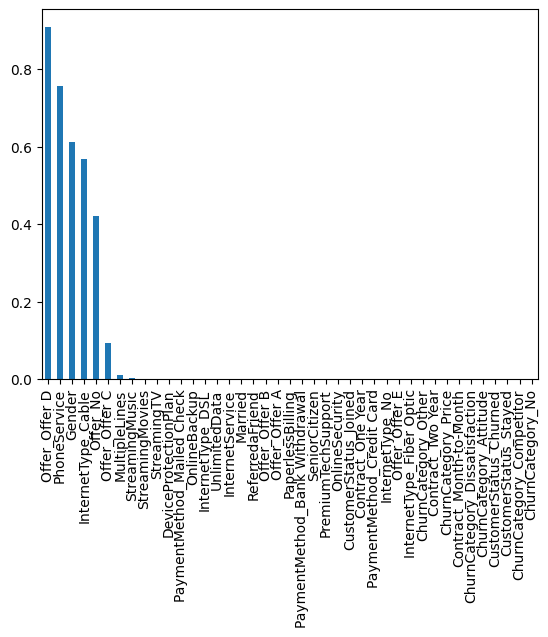

In [473]:
p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(ascending = False, inplace = True)
p_values.plot.bar()

Since 'Offer_Offer D', 'PhoneService', 'Gender', 'InternetType_Cable' have p value > 0.05. They can not be considred for the model and will be omitted from the dataframe.

In [474]:
new_df = new_df.drop(columns = ['Offer_Offer D', 'PhoneService', 'Gender', 'InternetType_Cable'])

In [476]:
new_df.columns

Index(['NumberofDependents', 'Population', 'Number_of_Referrals',
       'AvgMonthlyLongDistanceCharges', 'AvgMonthlyGBDownload', 'TotalRevenue',
       'SatisfactionScore', 'ChurnScore', 'SeniorCitizen', 'Married',
       'ReferredaFriend', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtectionPlan', 'PremiumTechSupport',
       'StreamingTV', 'StreamingMovies', 'StreamingMusic', 'UnlimitedData',
       'PaperlessBilling', 'ChurnLabel', 'Offer_No', 'Offer_Offer A',
       'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer E', 'InternetType_DSL',
       'InternetType_Fiber Optic', 'InternetType_No',
       'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year',
       'PaymentMethod_Bank Withdrawal', 'PaymentMethod_Credit Card',
       'PaymentMethod_Mailed Check', 'CustomerStatus_Churned',
       'CustomerStatus_Joined', 'CustomerStatus_Stayed',
       'ChurnCategory_Attitude', 'ChurnCategory_Competitor',
       'ChurnCategory_Dissatisf

# **Classification**
**In this case I use ChurnLabel as the Y variable**


Importing necessary libraries for Classification ML

In [499]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

<Axes: xlabel='ChurnLabel', ylabel='count'>

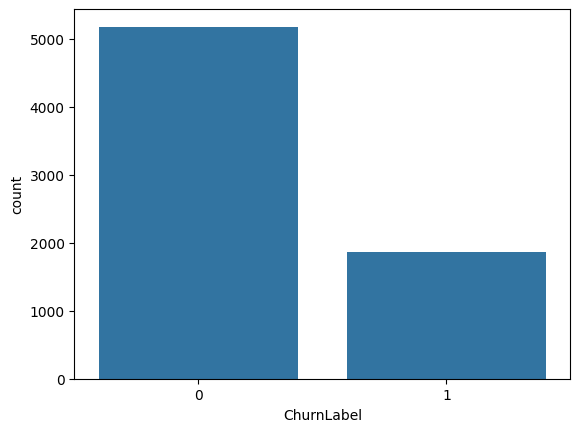

In [478]:
sns.countplot(data = new_df, x = 'ChurnLabel')

**Balancing the Dataset**

In [502]:
x = new_df.drop(columns = ['ChurnLabel'])
y = new_df['ChurnLabel']

Spliting the data into train and test sets

In [503]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [504]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 45)
(1409, 45)
(5634,)
(1409,)


Using SMOTE to balance 0 and 1 values of the Y variable

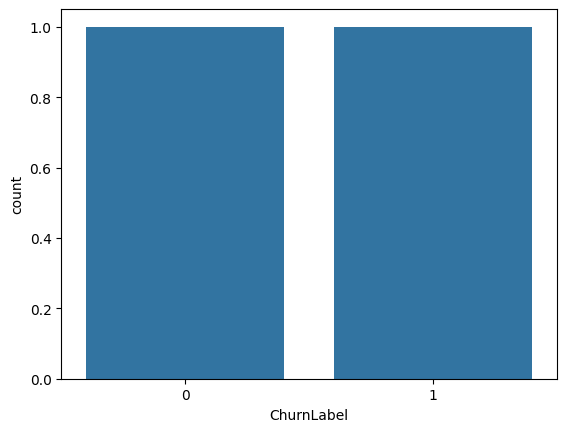

In [505]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
counter_before = Counter(y)
counter_after = Counter(y_train_resampled)
df_after = pd.DataFrame((counter_after.items()), columns = ['ChurnLabel', 'Count'])
sns.countplot(data = df_after, x = 'ChurnLabel')
plt.show()

**Logistic Regression**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



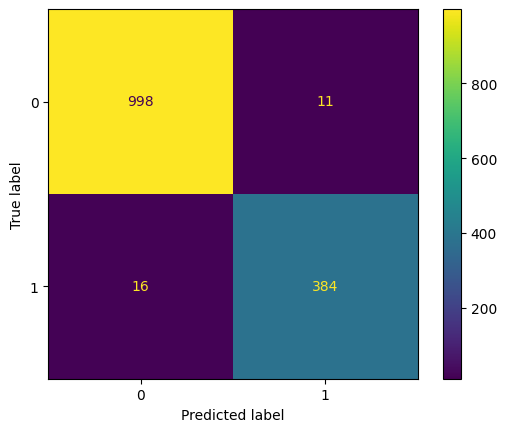

[[998  11]
 [ 16 384]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1009
           1       0.97      0.96      0.97       400

    accuracy                           0.98      1409
   macro avg       0.98      0.97      0.98      1409
weighted avg       0.98      0.98      0.98      1409

Accuracy score: 98.08374733853798


In [509]:
lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)
lr_pred = lr.predict(X_test)
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
plt.show()
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))
print('Accuracy score:',accuracy_score(y_test, lr_pred)*100)

# **Regression**
**In this case I use ChurnScore as Y variable**

Importing necessary libraries

In [495]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

Spliting the data into train and test sets

In [510]:
X = new_df.drop(columns = ['ChurnScore'])
y = new_df['ChurnScore']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [511]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print('MSE:', mean_squared_error(y_test, lr_pred))
print('R2:', r2_score(y_test, lr_pred))

MSE: 246.79142923369864
R2: 0.45584083551973875


In [512]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print('MSE:', mean_squared_error(y_test, rf_pred))
print('R2:', r2_score(y_test, rf_pred))

MSE: 254.83550695528743
R2: 0.43810416360375815
